In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel(r'clean_AMCAT_file_final.xlsx')

In [3]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure
0,420000,2012-06-01,2016-01-01,Senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,0.635979,445.0,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455,3.6
1,500000,2013-09-01,2016-01-01,Assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,0.960603,NaN,466.0,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637,2.3
2,325000,2014-06-01,2016-01-01,Systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,0.450877,395.0,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721,1.6
3,1100000,2011-07-01,2016-01-01,Senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,0.974396,615.0,NaN,NaN,0.0464,0.3448,-0.3440,-0.40780,-0.9194,4.5
4,200000,2014-03-01,2015-03-01,Get,Bhubaneswar,m,1991-02-27,78.0,cbse,2008,...,0.124502,NaN,233.0,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1.0


In [7]:
df.shape

(3998, 32)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   datetime64[ns]
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeTier            3998 non-null   int64         
 13  Deg

### Univariate --- Categorical analysis

In [12]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegePercent',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Tenure'],
      dtype='object')

In [14]:
cat_columns = ['Designation', 'JobCity', 'Gender', 'Degree', 'Specialization', 'CollegeState']

#### Question --- What is the designation of most of the candidates

In [4]:
val_count_desig_top10 = df['Designation'].value_counts(normalize = 'all').head(10)

In [5]:
np.round(val_count_desig_top10.values*100, decimals = 2)

array([13.48,  6.63,  5.13,  3.48,  2.95,  2.78,  2.5 ,  1.93,  1.9 ,
        1.8 ])

In [6]:
val_count_desig_top10[:] = np.round(val_count_desig_top10.values*100, decimals = 2)

In [7]:
valcount_desig_sorted = val_count_desig_top10.sort_values()

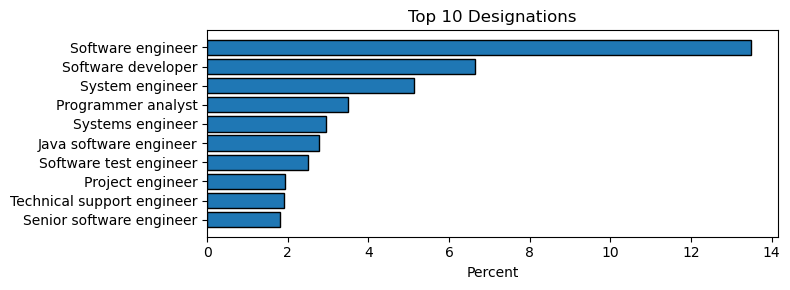

In [8]:
plt.figure(figsize = (8,3))
plt.barh(valcount_desig_sorted.index, valcount_desig_sorted.values, ec = 'black')
plt.title('Top 10 Designations')
plt.xlabel('Percent')
plt.tight_layout()
plt.show()

#### Observations

* Most of the candidates are working as Software developer/engineer.
* Can say that most of the candidates are working in software field.

#### Question ---- Which city has more job opportunities or in which cities are most of the candidates working

In [17]:
val_count_JobCity_top10 = df['JobCity'].value_counts(normalize = 'all').head(10)

In [19]:
val_count_JobCity_top10

JobCity
Bangalore    0.288894
Noida        0.097799
Hyderabad    0.092796
Pune         0.082041
Chennai      0.078789
New Delhi    0.056778
Gurgaon      0.055778
Mumbai       0.038269
Kolkata      0.029765
Jaipur       0.013257
Name: proportion, dtype: float64

In [21]:
val_count_JobCity_top10[:] = np.round(val_count_JobCity_top10.values * 100, decimals = 2)

* what is hapenning here is, when we are slicing...it is updating the value based on the index.
* since the new values are list or array, slicing works here
* If we don't use slicing, then it just saving the new values array in this variable without index

In [23]:
val_count_JobCity_top10

JobCity
Bangalore    28.89
Noida         9.78
Hyderabad     9.28
Pune          8.20
Chennai       7.88
New Delhi     5.68
Gurgaon       5.58
Mumbai        3.83
Kolkata       2.98
Jaipur        1.33
Name: proportion, dtype: float64

In [27]:
valcount_JobCity_sorted = val_count_JobCity_top10.sort_values()

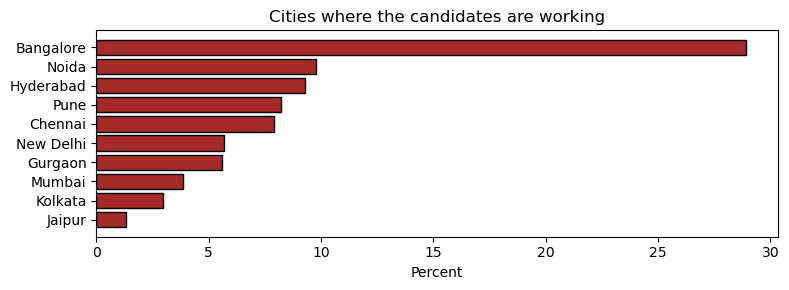

In [29]:
plt.figure(figsize = (8,3))
plt.barh(valcount_JobCity_sorted.index, valcount_JobCity_sorted.values, ec = 'black', color = 'brown')
plt.title('Cities where the candidates are working')
plt.xlabel('Percent')
plt.tight_layout()
plt.show()

#### Observations

* Most of candidates are doing their Job in Bangalore. Like almost 29% of candidates work in Bangalore.
* Almost 10 % of candidates work in Noida, and 9% in Hyderabad.
* The reason might be that most of the candidates live near Bangalore or noida or Hyderabad. Or these cities offer more opportunities compared to the rest.

#### Question --- distribution of male and female

In [42]:
val_count_gender = df['Gender'].value_counts(normalize = 'all').sort_values()

In [44]:
val_count_gender

Gender
f    0.23937
m    0.76063
Name: proportion, dtype: float64

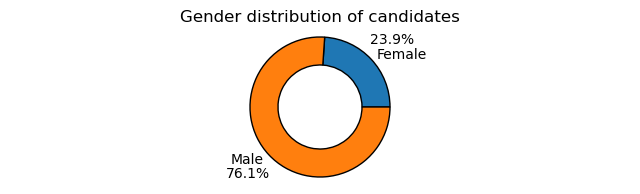

In [73]:
plt.figure(figsize = (8,2))
plt.pie(val_count_gender.values, labels = ['Female', 'Male'], autopct='%1.1f%%', wedgeprops={'width': 0.4, 'edgecolor' : 'black'}, pctdistance = 1.4)
plt.axis('equal')
plt.title('Gender distribution of candidates')
plt.show()

#### Observations

* Looks like this data can be biased, cause 76% of the candidates are male.

#### Question --- Degree of the candidates

In [67]:
val_count_Degree = df['Degree'].value_counts(normalize = 'all').sort_values()

In [101]:
val_count_Degree[:] = np.round(val_count_Degree.values * 100, decimals = 2)

In [103]:
val_count_Degree

Degree
M.sc. (tech.)     0.05
M.tech./m.e.      1.33
Mca               6.08
B.tech/b.e.      92.55
Name: proportion, dtype: float64

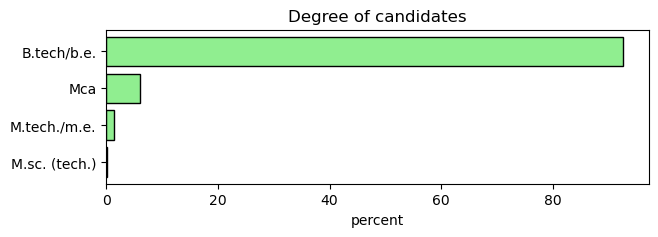

In [105]:
plt.figure(figsize = (7,2))
plt.barh(val_count_Degree.index, val_count_Degree.values, ec = 'black', color = 'lightgreen')
plt.title('Degree of candidates')
plt.xlabel('percent')
plt.show()

#### Observations

* Most of the candidates did B.Tech/B.E. (almost 92%) maybe because this course was in demand during 2010s or maybe this stream had good job opportunities after completing this degree.
* Or people were interested in engineering.
* 6% of the candidates did MCA

#### Question -- what was the preferred specialization by most of the candidates

In [8]:
val_count_specialization_top5 = df['Specialization'].value_counts(normalize = 'all').head().sort_values()

In [10]:
val_count_specialization_top5[:] = np.round(val_count_specialization_top5.values * 100, 2)

In [12]:
val_count_specialization_top5

Specialization
Civil engineering       0.73
Mechanical              5.40
EEE                     7.03
ECE_instrumentation    28.11
CS                     57.23
Name: proportion, dtype: float64

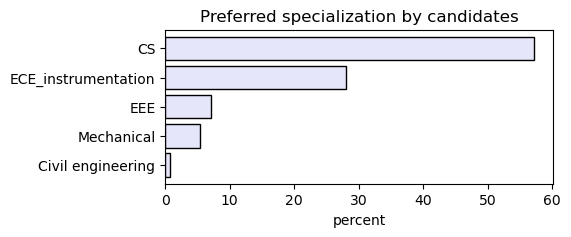

In [16]:
plt.figure(figsize = (5,2))
plt.barh(val_count_specialization_top5.index, val_count_specialization_top5.values, ec = 'black', color = 'lavender')
plt.title('Preferred specialization by candidates')
plt.xlabel('percent')
plt.show()

#### Observations

* 57% of candidates took Computer Science or maybe 57% of candidates might be interested in learning Computer science.
* 28% of candidates did Electronics, or Telecommunications or Instrumentation course.
* Less than 1% of candidates did civil engineering.

#### Question --- From which states did candidates do their degree

In [131]:
val_count_collegecity_top10 = df['CollegeState'].value_counts(normalize = 'all').head(10).sort_values()

In [135]:
val_count_collegecity_top10[:] = np.round(val_count_collegecity_top10.values * 100, decimals = 2)

In [137]:
val_count_collegecity_top10

CollegeState
Haryana            4.50
Madhya pradesh     4.73
Punjab             4.83
West bengal        4.90
Andhra pradesh     5.63
Maharashtra        6.55
Telangana          7.98
Tamil nadu         9.18
Karnataka          9.25
Uttar pradesh     22.89
Name: proportion, dtype: float64

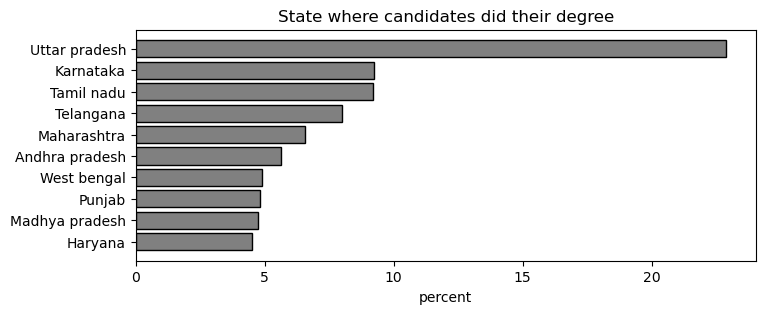

In [139]:
plt.figure(figsize = (8,3))
plt.barh(val_count_collegecity_top10.index, val_count_collegecity_top10.values, ec = 'black', color = 'grey')
plt.title('State where candidates did their degree')
plt.xlabel('percent')
plt.show()

#### Observations
* almost 23% of candidates did Degree in Uttar Pradesh, few of the reasons might be there are more people of 18 - 22 years age in Uttar Pradesh compared to rest of the states or there are good colleges in Uttar Pradesh(most of IITs and NITs are in Uttar Pradesh).
* 9% of people did their defree in Karnataka and 9% from Tamil Nadu. 

#### Question ---- From which tier college did most of the candidates graduate

In [143]:
val_count_college_tier = df['CollegeTier'].value_counts(normalize = 'all').sort_values()

In [145]:
val_count_college_tier

CollegeTier
1    0.074287
2    0.925713
Name: proportion, dtype: float64

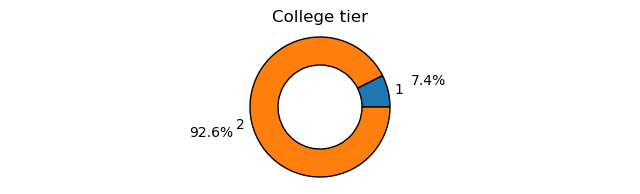

In [153]:
plt.figure(figsize = (8,2))
plt.pie(val_count_college_tier.values, labels = val_count_college_tier.index, autopct='%1.1f%%', wedgeprops={'width': 0.4, 'edgecolor' : 'black'}, pctdistance = 1.6)
plt.axis('equal')
plt.title('College tier')
plt.show()

#### Observations
* 92.6% of candidates are from Tier-2 colleges
* 7.4% of candidates are from Tier-1 colleges.
* It is surprising to see that there are candidates from Tier-3 colleges.

=========================================
========================================

### Univariate -- Numerical analysis

In [18]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegePercent',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Tenure'],
      dtype='object')

#### Understanding about Salary column

In [34]:
pd.options.display.float_format = '{:,.2f}'.format
df['Salary'].agg(['min', 'max', 'mean', 'median', 'std', 'skew'])

min         35,000.00
max      4,000,000.00
mean       307,699.85
median     300,000.00
std        212,737.50
skew             6.45
Name: Salary, dtype: float64

#### Observations
* Median is around 3,00,000. This says that on avg CTC of the candidate is 3,00,000.
* Minimum salary is 35k and max salary is 40,00,000
* But we can not say this for sure since tenure and designation matters.
* skew is 6 which means that most of the data is on the lower side and the rest of the data is on the higher side.

<Axes: xlabel='Salary'>

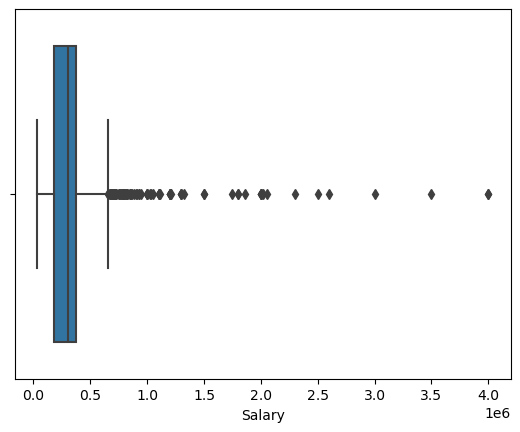

In [37]:
sns.boxplot(x = df['Salary'])

In [39]:
df['Salary'].quantile(0.25)

180000.0

In [41]:
df['Salary'].quantile(0.75)

370000.0

#### Observations

* 75% of candidate's CTC is less than 3,70,000 and 25% of candidate's CTC is greater than 3,70,000.

#### Understanding Collegepercent distribution

In [57]:
df['collegePercent'].agg(['min', 'max', 'mean', 'median', 'std', 'skew'])

min      49.07
max      99.93
mean     71.70
median   71.80
std       7.41
skew      0.17
Name: collegePercent, dtype: float64

#### Observations

* On avg every candidate has scored 71% in their degree.
* skew is less than 0.5, menas the data is almost symmetrical, means this column follows a bell curve.

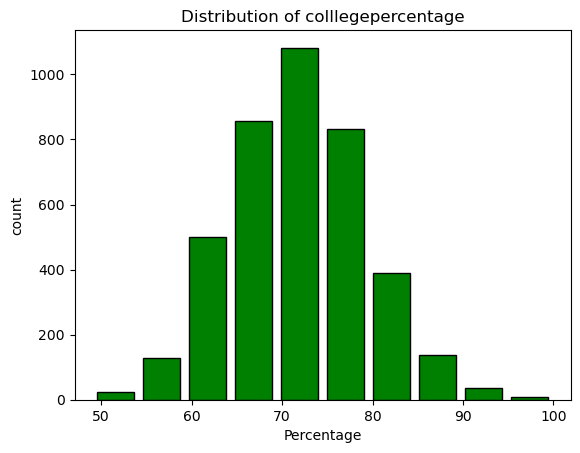

In [139]:
plt.hist(df['collegePercent'], rwidth = 0.8, ec = 'black', color = 'green')
plt.title('Distribution of colllegepercentage')
plt.xlabel('Percentage')
plt.ylabel('count')
plt.show()

In [66]:
df['collegePercent'].quantile(0.75)

76.4

In [68]:
df['collegePercent'].quantile(0.25)

66.505

#### Observations

* 75% of candidate's scored more than 66.5% in their degree course.

#### Understanding distribution of English, Quant, and Logical section scores

In [71]:
scores_num_col = ['English', 'Logical', 'Quant']

In [81]:
for col in scores_num_col:

    print(f'**************{col} column*************')
    print()
    print(f'75th quantile : {df[col].quantile(0.75)}')
    print(f'25th quantile : {df[col].quantile(0.25)}')
    print(df[col].agg(['min', 'max', 'mean', 'median', 'std', 'skew']))
    print()

**************English column*************

75th quantile : 570.0
25th quantile : 425.0
min      180.00
max      875.00
mean     501.65
median   500.00
std      104.94
skew       0.19
Name: English, dtype: float64

**************Logical column*************

75th quantile : 565.0
25th quantile : 445.0
min      195.00
max      795.00
mean     501.60
median   505.00
std       86.78
skew      -0.22
Name: Logical, dtype: float64

**************Quant column*************

75th quantile : 595.0
25th quantile : 430.0
min      120.00
max      900.00
mean     513.38
median   515.00
std      122.30
skew      -0.02
Name: Quant, dtype: float64



#### Observations

* For quant section, 75% of candidates scored more than 430.
* On avg most of candidates scored around 513 in Quant section.

* For Logical section, 75% of candidates scored more than 445.
* On avg most of the candidates scored around 501 in Logical section.

* For English section, 75% of candidates scored more than 425.
* On avg most of the candidates scored around 501 in English section.

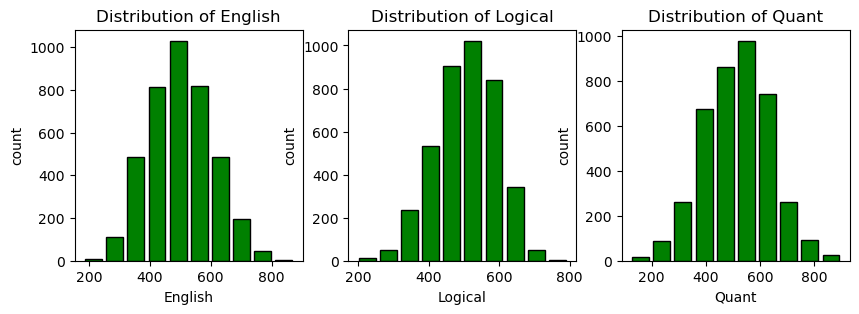

In [111]:
 fig, axis = plt.subplots(1, 3, figsize = (10,3))

for i in range(len(scores_num_col)):
    axis[i].hist(df[scores_num_col[i]], rwidth = 0.8, ec = 'black', color = 'green')
    axis[i].set_title(f'Distribution of {scores_num_col[i]}')
    axis[i].set_xlabel(scores_num_col[i])
    axis[i].set_ylabel('count')

plt.show()

#### Observations

* English, quant and logical scores are almost symmetric. It means that there are candidates who scored less, high and somewhere in between.

#### Understanding distribtion of tenure column

In [117]:
df['Tenure'].agg(['min', 'max', 'mean', 'median', 'std', 'skew'])

min       0.00
max      24.60
mean      1.74
median    1.50
std       1.21
skew      2.60
Name: Tenure, dtype: float64

#### Observations
* On avg most of candidates have experience of around 1 and half year.
* And there is someone who has 24 years of experience in the dataset.

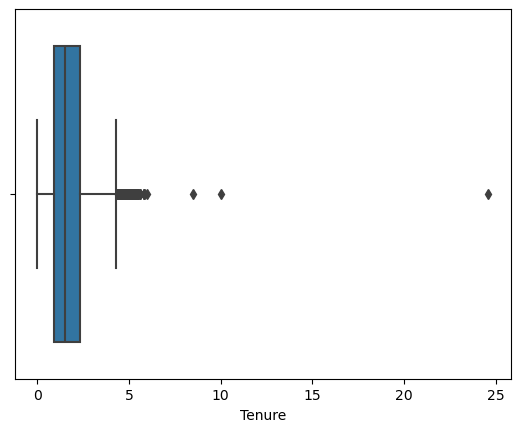

In [122]:
sns.boxplot(x = df['Tenure'])
plt.show()

In [125]:
df['Tenure'].quantile(0.25)

0.9

In [129]:
df['Tenure'].quantile(0.75)

2.3

#### Observations

* There are people with 8 yrs of experince and 11 yrs of experience and 24 yrs of experience these are outliers.
* Means these people have more experience compared to the entire data.
* 75% of candidates have less than 2.3 yrs of experience and 25% of candidates have more than 2.3yrs of experience

#### comment
* Under the scores section, only analyzed the common sections for all streams so that we can get something from data.

===========================================
=========================

### Bi-variate analysis -- Cat Vs Cat

In [8]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegePercent',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Tenure'],
      dtype='object')

#### Question ---- any relation between gender and specialization

In [51]:
ct_gen_specialization = pd.crosstab(df['Specialization'], df['Gender'], normalize = 'columns', margins = True, margins_name = 'Total')

In [55]:
ct_gen_specialization.sort_values(by = 'Total', ascending = False)

Gender,f,m,Total
Specialization,,,
CS,0.630094,0.554094,0.572286
ECE_instrumentation,0.282132,0.280829,0.281141
EEE,0.053292,0.075633,0.070285
Mechanical,0.011494,0.067412,0.054027
Civil engineering,0.006270,0.007563,0.007254
Biotechnology,0.009404,0.001973,0.003752
Other,0.000000,0.004275,0.003252
Industrial & production engineering,0.002090,0.002631,0.002501
Chemical engineering,0.001045,0.002631,0.002251


#### Observations

* Compared to **male** there are 8% more **female** in **CS branch**, there is a possibility that more female preferred to do CS compared to male.
* In **EEE** and **Mechanical** male candidates are bit more compared to female.

### Categorical Vs Numerical analysis

In [63]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegePercent',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Tenure'],
      dtype='object')

#### Question ---- relation between salary and Designation

In [129]:
df['Designation'].value_counts().head(10)

Designation
Software engineer             539
Software developer            265
System engineer               205
Programmer analyst            139
Systems engineer              118
Java software engineer        111
Software test engineer        100
Project engineer               77
Technical support engineer     76
Senior software engineer       72
Name: count, dtype: int64

In [131]:
df['Designation'].replace('System engineer', 'Systems engineer', inplace = True)

In [141]:
df[ df['Designation'].isin(['Software eng', 'Associate software engg', 'Software engg', 'Software engineere', 'Software engineer associate',
'Software enginner', 'It engineer','Software engineer trainee','Software trainee engineer', 'Jr. software developer', 'Software devloper','Junior software developer',
'Software trainee', 'Software development engineer', 'Trainee software engineer', 'Assistant software engineer', 'Trainee software developer',
 'Jr. software engineer', 'Software developer', 'Associate software engineer', 'Software engineer', 'Associate software developer'])]

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure
17,250000,2013-08-01,2014-09-01,Associate software developer,Gurgaon,m,1987-09-28,60.80,cbse,2006,...,0.911395,545.0,NaN,500.0,0.8463,1.0449,-1.0659,-1.62890,0.6721,1.1
19,325000,2014-09-01,2016-01-01,Software engineer,Pune,f,1990-11-30,79.00,cbse,2008,...,0.864685,525.0,NaN,NaN,0.8192,0.2668,-0.2714,-0.40780,-0.1295,1.3
20,320000,2010-11-01,2012-09-01,Software engineer,Bangalore,f,1988-07-25,91.20,karnataka secondary school of examination,2006,...,0.635979,445.0,NaN,NaN,-0.1082,0.9688,0.5269,-0.29020,0.3444,1.8
21,200000,2012-08-01,2013-12-01,Software engineer,Bangalore,f,1991-08-20,75.67,up,2007,...,0.635979,445.0,NaN,NaN,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,1.3
31,340000,2014-08-01,2015-04-01,Software engineer,Bangalore,m,1992-10-23,77.20,state board,2010,...,0.622643,485.0,NaN,407.0,-0.0154,1.2114,1.0859,-1.50210,0.2889,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,480000,2011-12-01,2016-01-01,Software engineer,Gurgaon,f,1990-01-18,89.80,cbse,2007,...,0.843124,515.0,NaN,NaN,-0.2628,0.1888,0.3817,-0.29020,1.6082,4.1
3989,300000,2014-09-01,2016-01-01,Software engineer,Bangalore,m,1991-11-23,74.88,state board,2010,...,0.356536,465.0,NaN,346.0,0.1282,0.0459,1.2396,1.03330,0.6721,1.3
3993,280000,2011-10-01,2012-10-01,Software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,...,0.276047,345.0,NaN,NaN,-0.1082,0.3448,0.2366,0.64980,-0.9194,1.0
3995,320000,2013-07-01,2016-01-01,Associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,...,0.488348,405.0,NaN,NaN,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,2.5


In [143]:
software_index = df[ df['Designation'].isin(['Software eng', 'Associate software engg', 'Software engg', 'Software engineere', 'Software engineer associate',
'Software enginner', 'It engineer','Software engineer trainee','Software trainee engineer', 'Jr. software developer', 'Software devloper','Junior software developer',
'Software trainee', 'Software development engineer', 'Trainee software engineer', 'Assistant software engineer', 'Trainee software developer',
 'Jr. software engineer', 'Software developer', 'Associate software engineer', 'Software engineer', 'Associate software developer'])].index

In [145]:
software_index

Index([  17,   19,   20,   21,   31,   36,   38,   41,   42,   46,
       ...
       3970, 3977, 3978, 3979, 3981, 3984, 3989, 3993, 3995, 3996],
      dtype='int64', length=912)

In [149]:
df.loc[software_index, 'Designation'] = 'Software engineer/developer'

In [151]:
df.loc[software_index, 'Designation']

17      Software engineer/developer
19      Software engineer/developer
20      Software engineer/developer
21      Software engineer/developer
31      Software engineer/developer
                   ...             
3984    Software engineer/developer
3989    Software engineer/developer
3993    Software engineer/developer
3995    Software engineer/developer
3996    Software engineer/developer
Name: Designation, Length: 912, dtype: object

In [157]:
df[ df['Designation'].isin(['System engineer trainee','Assistant system engineer trainee','Assistant system engineer - trainee'])].index

Index([3121, 3145, 3342], dtype='int64')

In [169]:
df.loc[[3121,3145,3342],'Designation'] = 'Systems engineer'

In [171]:
df.loc[[3121,3145,3342],'Designation']

3121    Systems engineer
3145    Systems engineer
3342    Systems engineer
Name: Designation, dtype: object

In [173]:
df['Designation'].nunique()

394

In [175]:
df['Designation'].unique()

array(['Senior quality engineer', 'Assistant manager', 'Systems engineer',
       'Senior software engineer', 'Get', 'Java software engineer',
       'Mechanical engineer', 'Electrical engineer', 'Project engineer',
       'Senior php developer', 'Senior systems engineer',
       'Quality assurance engineer', 'Qa analyst', 'Network engineer',
       'Product development engineer', 'Software engineer/developer',
       'Data entry operator', 'Developer', 'Electrical project engineer',
       'Programmer analyst', 'Systems analyst', 'Ase',
       'Telecommunication engineer', 'Application developer',
       'Ios developer', 'Executive assistant', 'Online marketing manager',
       'Documentation specialist', 'Management trainee', 'Site manager',
       '.net developer', 'Production engineer', 'Ui developer',
       'Assistant system engineer', 'Android developer',
       'Customer service', 'Test engineer', 'Java developer', 'Engineer',
       'Recruitment coordinator', 'Technical suppor

In [189]:
df[ df['Designation'] == 'Junior software engineer'].index

Index([155, 299, 860, 1606, 1772, 2515, 2797, 2852, 3776], dtype='int64')

In [197]:
df.loc[[155, 299, 860, 1606, 1772, 2515, 2797, 2852, 3776], 'Designation'] = 'Software engineer/developer'

In [203]:
prog_analyst_index = df[ df['Designation'].isin(['Programmer analyst trainee', 'Programmer analyst'])].index

In [207]:
df.loc[prog_analyst_index, 'Designation'] = 'Programmer analyst'

In [183]:
sys_eng_index = df[ df['Designation'] == 'Assistant system engineer'].index

In [185]:
df.loc[sys_eng_index, 'Designation'] = 'Systems engineer'

In [209]:
df['Designation'].nunique()

391

In [218]:
gp = df.groupby('Designation')['Salary'].mean().sort_values(ascending = False)

In [222]:
gp.head(10)

Designation
Junior manager           1.300000e+06
Senior developer         1.110000e+06
Data scientist           8.966667e+05
Field engineer           8.016667e+05
Asst. manager            8.000000e+05
Research scientist       7.300000e+05
Branch manager           7.125000e+05
Sales account manager    7.100000e+05
Technical lead           6.690000e+05
Technology lead          6.450000e+05
Name: Salary, dtype: float64

#### Observations
* Can not conclude anything from this. Since there are many unique Designations and there are many designations where there are less than 20 or 10 candidates.

#### Question ---- relation between slary and collegetier

<Axes: xlabel='CollegeTier', ylabel='Salary'>

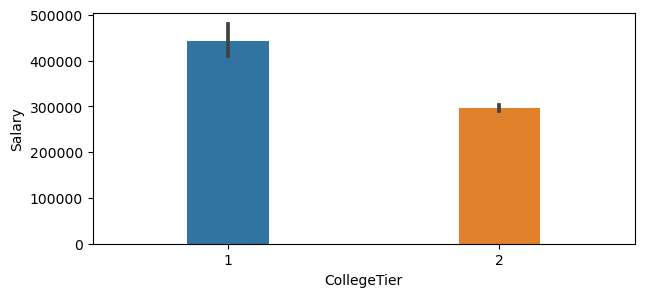

In [251]:
plt.figure(figsize = (7,3))
sns.barplot(x = df['CollegeTier'], y = df['Salary'], width = 0.3)

#### Observations
* Since only 10% of candidates are from Tier-1 college, can not say for sure that salaries of Tier-1 students are higher than the Tier-2 college students.

### Numerical Vs Numerical analysis

#### Question ---- relation btw Quant, Logical scores and salary

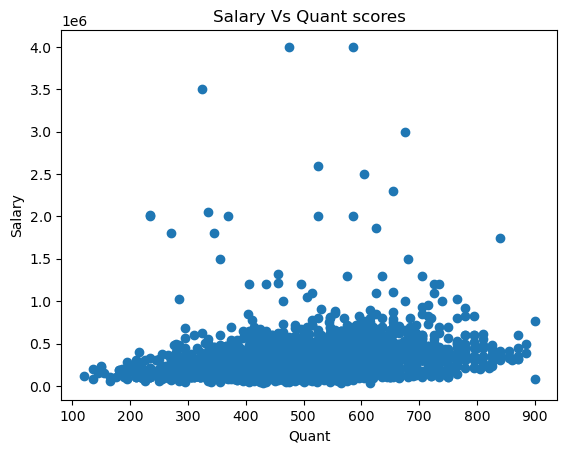

In [236]:
plt.scatter(x = df['Quant'], y = df['Salary'])
plt.ylabel('Salary')
plt.xlabel('Quant')
plt.title('Salary Vs Quant scores')
plt.show()

#### Observations

* Salary is not affected by the Quant section scores. Since qaunt, logical, and english scetion scores are almost similar..we can say that salary is not affected by scores.

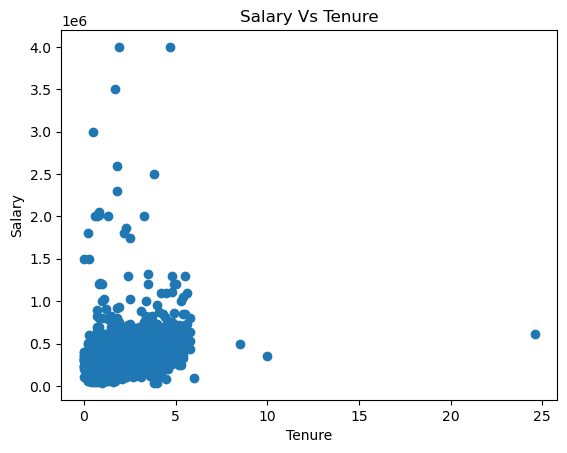

In [241]:
plt.scatter(x = df['Tenure'], y = df['Salary'])
plt.ylabel('Salary')
plt.xlabel('Tenure')
plt.title('Salary Vs Tenure')
plt.show()

#### Observations

* Can say that there is not much relationship between tenure and salary.

===================================================
============================

#### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.

In [258]:
df['Specialization'].unique()

array(['CS', 'ECE_instrumentation', 'Mechanical', 'EEE',
       'Civil engineering', 'Industrial & production engineering',
       'Metallurgical engineering', 'Ceramic engineering',
       'Chemical engineering', 'Aeronautical engineering', 'Other',
       'Biotechnology', 'Polymer technology',
       'Industrial & management engineering', 'Industrial engineering',
       'Internal combustion engine', 'Biomedical engineering'],
      dtype=object)

In [ ]:
'Programmer analyst'

In [270]:
df[ df['Designation'].str.contains('Program', case = False) ]['Designation'].unique()

array(['Programmer analyst', 'Programmer', 'Assistant programmer',
       'Software programmer', 'Cnc programmer', 'Senior programmer',
       'Program manager', 'Program analyst trainee'], dtype=object)

In [276]:
df[ df['Designation'] == 'Program analyst trainee']

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure
3600,325000,2014-11-01,2016-01-01,Program analyst trainee,Hyderabad,f,1993-08-22,87.0,state board,2010,...,0.943272,405.0,452.0,NaN,0.5591,0.8784,0.9322,-0.8682,1.0554,1.2


In [280]:
df.loc[3600, 'Designation'] = 'Programmer analyst'

In [ ]:
 "software engineer", "hardware engineer", "associate engineer"

In [303]:
req_df = df [ (df['Specialization'] == 'CS') & (df['Designation'].isin(['Programmer analyst', 'Software engineer/developer', 'Hardware engineer', 'Associate engineer']))]

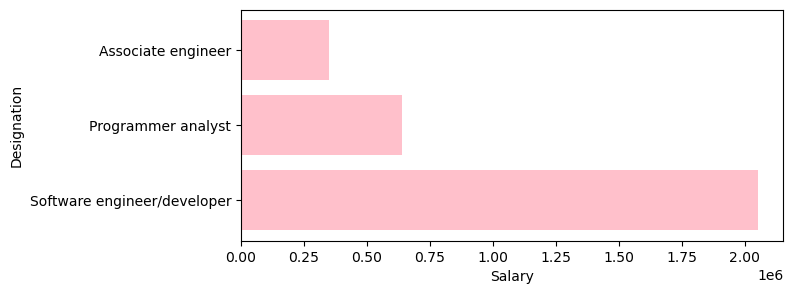

In [323]:
plt.figure(figsize = (7,3))
plt.barh(req_df['Designation'], req_df['Salary'], color = 'pink')
plt.xlabel('Salary')
plt.ylabel('Designation')
plt.show()

#### Observations

* We can see that the avg salary is 2,50,000 for 'associate engineer' role and bit a more for 'Programmer analyst'....and since software engineer has outliers the value is 20,00,00.
* But we can not say for sure because there are few people under Programmer analyst and associate engineer